[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset size: (44898, 5)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



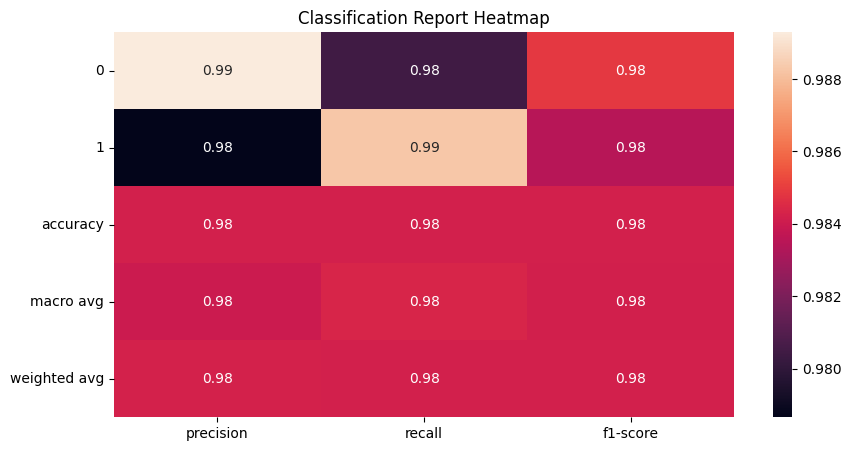

In [1]:
# %% [markdown]
# # Fake News Classifier
# ## Model Training Notebook

# %% [code]
# Install required packages (if needed in local Jupyter)
# !pip install pandas numpy scikit-learn nltk seaborn matplotlib

# %% [code]
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# %% [code]
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# %% [code]
# Load both datasets
fake_df = pd.read_csv('C:/Users/Dell/Desktop/streamlit for the fake news/Fake.csv')
true_df = pd.read_csv('C:/Users/Dell/Desktop/streamlit for the fake news/True.csv')

# Assign labels
fake_df['label'] = 0
true_df['label'] = 1

# Combine datasets
df = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Dataset size: {df.shape}")

# %% [code]
# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# %% [code]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'],
    df['label'],
    test_size=0.2,
    random_state=42
)

# %% [code]
# Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# %% [code]
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# %% [code]
# Evaluation
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

# %% [code]
# Save model and vectorizer
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# %% [code]
# Visualization
plt.figure(figsize=(10,5))
sns.heatmap(pd.DataFrame(classification_report(y_test, preds, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title('Classification Report Heatmap')
plt.show()
